# Part 1: Mutual Information Classification

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [6]:
loan_data=pd.read_csv("loan.csv")

In [7]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Step 2: Apply necessary processing
# Label encoding for the target variable and handling null values
label_encoder = LabelEncoder()
loan_data['Loan_Status'] = label_encoder.fit_transform(loan_data['Loan_Status'])

In [25]:

# One-hot encoding for all categorical features
loan_data = pd.get_dummies(loan_data, drop_first=True)


In [26]:
# Handling null values (you might need to customize this based on your dataset)
loan_data = loan_data.fillna(0)  # Filling null values with 0 for simplicity

In [27]:
# Step 3: Separate features (X) and target variable (y: Loan_Status)
X = loan_data.drop('Loan_Status', axis=1)  # Features
y = loan_data['Loan_Status']  # Target variable

In [28]:
# Step 4: Use SelectKBest for feature selection
k_best_features = 5  # Choose an appropriate value of K (number of features to select)

In [29]:
# Initialize SelectKBest with mutual information classification
feature_selector = SelectKBest(score_func=mutual_info_classif, k=k_best_features)


In [30]:
# Fit the feature selection model and transform the feature matrix accordingly
X_selected = feature_selector.fit_transform(X, y)

In [31]:
# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)


In [32]:
# Print the names or indices of the selected features
selected_feature_names = X.columns[selected_feature_indices]
print(f"Selected Features: {selected_feature_names}")

Selected Features: Index(['Credit_History', 'Loan_ID_LP001384', 'Loan_ID_LP002284',
       'Loan_ID_LP002317', 'Loan_ID_LP002862'],
      dtype='object')


# Part 2: Mutual Information Regression

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder



In [168]:
# Load the dataset
df = pd.read_csv('Housing.csv')


In [171]:
# Separate features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)  # Assuming 'Price' is the target variable
y = df['SalePrice']

In [172]:
# Handle categorical features with label encoding
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include='object')
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)
X[X_categorical.columns] = X_categorical_encoded


In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [175]:
# Use SelectKBest to select the top K features based on mutual information scores
k = 5  # Choose an appropriate value of K
selector = SelectKBest(score_func=mutual_info_regression, k=k)



In [176]:
# Fit the feature selection model on the dataset and transform the feature matrix
X_selected = selector.fit_transform(X_train, y_train)

In [177]:
# Get the names or indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]



In [178]:
# Print the names or indices of the selected features
print("Selected Feature Names:", selected_feature_names)
print("Selected Feature Indices:", selected_feature_indices)

Selected Feature Names: Index(['Neighborhood', 'OverallQual', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea'],
      dtype='object')
Selected Feature Indices: [12 17 38 46 62]


# Part 3 : Linear Regression on the Housing Dataset

In [146]:
# Step 1: Load the Housing dataset using the pandas library
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [147]:
housing_data=pd.read_csv("Housing.csv")

In [148]:
# Step 2: Apply necessary preprocessing steps
# Assuming 'X' has categorical features, perform one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid the dummy variable trap


In [150]:
# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)


In [151]:
# Separate the features (X) and the target variable (y) from the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)



In [152]:
# Fit a linear regression model to the training data
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [153]:
# Predict house prices for the testing data
y_pred = linear_reg_model.predict(X_test)

In [154]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [155]:
# Print the MSE and R^2 values to assess the model's accuracy
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 2419721731.0240765
Coefficient of Determination (R^2): 0.6845347035231972


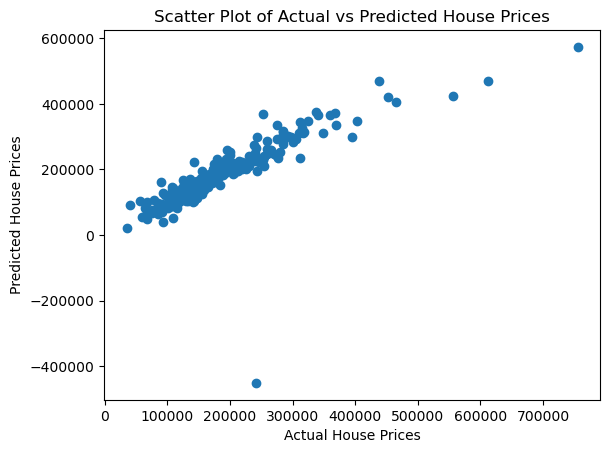

In [156]:
# Plot a scatter plot between the predicted and actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Scatter Plot of Actual vs Predicted House Prices")
plt.show()